In [70]:
%matplotlib inline

import os,sys
import numpy as np
import healpy as hp
import pandas as pd
import gmca4im_lib2 as g4i
import astropy.io.fits as fits
import Extension4BINGO as cs
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
rc('text', usetex=True)
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [74]:
#######################################################
################   GENERAL INFORMATIONS   #############
#######################################################
wtransform       = "starlet"
maps_wout_mean   = True
apply_mask       = False
add_noise        = False
#######################################################
################   WAVELETS PARAMETERS   ##############
#######################################################
J     = 1     #number of scales
use_c = True  # if you will use wavelet scale in the analysis
##############
# If you to use wtransforms by S2Let code, please, fill in the variables below:
L        = None #If you write "None", it will use L=3*nside
J_min    = 1
B        = 3
N        = 3  # Number of directions (This is for Directional only)
spin     = 0  # set to 0 for temperature. if non-zero, plotting routines must be changed! (This is for Directional only)
upsample = 0  # 1 means all scales at full resolution L # 0 means multiresolution wavelet transform (This is for Directional only)

# In the S2LET code, J scales is defined by code and not by J above.
#######################################################
################   GMCA PARAMETERS   ##################
#######################################################
n_s   = 3   # number of sources to be estimated
mints = 0.1 # min threshold (what is sparse compared to noise?)
nmax  = 100 # number of iterations (usually 100 is safe)
L0    = 0   # switch between L0 norm (1) or L1 norm (0)
#######################################################
AInit     = None
ColFixed  = None
whitening = False
epsi      = 1e-3
verbose   = False
#GMCAExtension
div          = 1    #  J+1  #J/div will should be even number
without_covx = True # if your mixmatrix estimated will use covariance matrix of the observer data with ponderation
#######################################################
################   PATHS PARAMETERS   #################
#######################################################
#directory path inputs
path = "/home/marins/Documents/Programmation/BINGO/Component Separation/maps/others"
#path outputs
pathout  = "/home/marins/Documents/Programmation/BINGO/Component Separation/gmca4im/cls_output" #Put here your path to the output cls
cl_type_save  = "reconstruction" #You should choice between reconstruction or residuals cls values
#######################################################
################   NAME FILES PARAMETERS   ############
#######################################################
# Name of FITS files inside of the pathmaps
#Directory names
path = "/home/marins/Documents/Programmation/BINGO/Component Separation/maps/others"

name_mask     = "Mask_Bin.fits"
name_observed = "Cube_5PSM_L10_RS.fits"#"Cube_5PSM_L10_RS.fits"
name_pure     = "Cube_21_Smooth_L10.fits"
name_noise    = "bingo_WN_256_mK_CubeA_10Masked.fits"

In [79]:
params_CS   = pd.Series({"A_ini":AInit, "ColFixed":ColFixed, "whitening":whitening, "epsi":epsi, "verbose":verbose, "ns":n_s, "mints":mints,"nmax":nmax, "L0":L0, "division":div, "without_covx":without_covx})
params_WT   = pd.Series({"wtransform":wtransform, "J":J, "use_c":use_c, "L":L, "Jmin":J_min, "B": B, "N":N, "spin":spin, "upsample":upsample})

parmaps = pd.Series({"getdata":"observed", "apply_mask":False, "without_mean":True})
parpath = pd.Series({"dir_observed":path,"dir_mask":path, "name_mask":name_mask,"name_observed":name_observed})
Xobs    = cs.adaptation_maps(cs.getmaps(parmaps, parpath), parmaps, parpath)

parmaps = pd.Series({"getdata":"pure", "apply_mask":False, "without_mean":True})
parpath = pd.Series({"dir_pure":path  ,"dir_mask":path, "name_mask":name_mask,"name_pure":name_pure})
Xhi     = cs.adaptation_maps(cs.getmaps(parmaps, parpath), parmaps, parpath)

mrec = cs.maps2GMCAmaps(Xobs, params_WT, params_CS)
clear_output(wait=True)    


Wavelet transforming the data . . .
. . completed in 2.30 minutes

Starting Component Analysis...
Building reconstructed maps...
Building residuals maps...
Finished in: 2.07 min


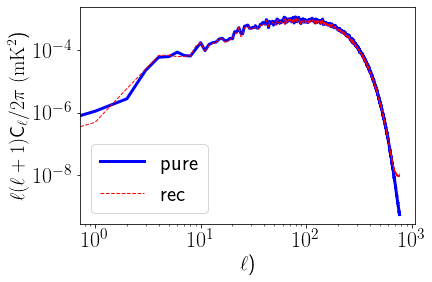

In [80]:
i     = np.random.randint(Xhi.shape[0])
cl1   = hp.anafast(Xhi[i])
cl2   = hp.anafast(mrec["reconstruction"]["21cm"][i])
#cl3  = hp.anafast(Xobs[i])
l1    = np.arange(len(cl1))
fact1 = l1*(l1+1)/(2*np.pi)
l2    = np.arange(len(cl2))
fact2 = l2*(l2+1)/(2*np.pi)

plt.plot(l1,fact1*cl1, linestyle = "solid", linewidth=3, color="blue", label="pure")
plt.plot(l2,fact2*cl2, linestyle = "dashed", linewidth=1, color="red", label="rec")
plt.xlabel(r"$\ell$)", fontsize=20)
plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ $(\textrm{mK}^2$)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.legend()